In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from itertools import chain, combinations
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
CA_climate_fire = pd.read_csv('../data/cleaned-data/CA_climate_fire.csv')

In [4]:
CA_climate_fire_filtered = CA_climate_fire[['tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 'fire']]
print(CA_climate_fire_filtered.head())

   tempmax  tempmin  humidity  precip  windspeed fire
0     14.3      5.4      85.7   0.000       11.2   No
1     17.0      4.2      78.1   0.000       19.0   No
2     15.0      3.8      83.0   0.000        9.0   No
3     13.6      5.7      89.6   1.736       16.7   No
4     15.1      3.2      80.9   0.000       16.2   No


In [5]:
# Split the dataset into features and the target variable 
X = CA_climate_fire_filtered.drop(columns=["fire"]) 
y = CA_climate_fire_filtered["fire"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# Initialize variables to keep track of the best feature set and its accuracy
best_feature_set = None
best_accuracy = 0.0
# Generate all possible feature combinations using the powerset function
all_feature_combinations = list(powerset(X.columns))

# Loop through each feature combination
for feature_set in all_feature_combinations:
    if len(feature_set) > 0:  # Skip the empty set
        # Subset the training and testing data using the current feature set
        X_train_subset = X_train[list(feature_set)]
        X_test_subset = X_test[list(feature_set)]

        # Initialize and train a Gaussian Naïve Bayes classifier
        gnb = GaussianNB()
        gnb.fit(X_train_subset, y_train)

        # Make predictions on the testing data
        y_pred = gnb.predict(X_test_subset)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Update the best feature set if the current one is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature_set = feature_set

# Print the best feature set and its accuracy
print("Best Feature Set:", best_feature_set)
print("Best Accuracy:", best_accuracy)

Best Feature Set: ('tempmax', 'tempmin')
Best Accuracy: 0.8773333333333333


Accuracy: 0.8773333333333333
Confusion Matrix:
[[313  12]
 [ 34  16]]
Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.96      0.93       325
         Yes       0.57      0.32      0.41        50

    accuracy                           0.88       375
   macro avg       0.74      0.64      0.67       375
weighted avg       0.86      0.88      0.86       375



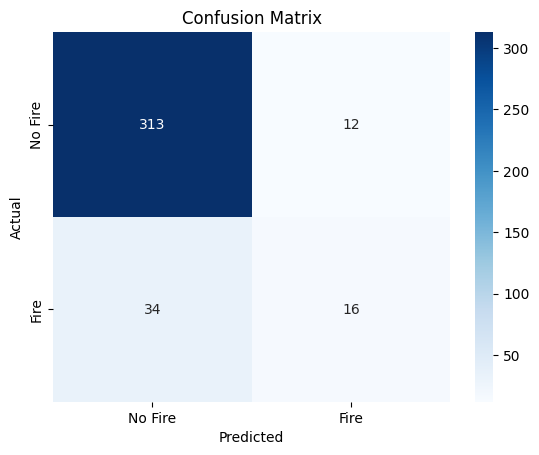

In [6]:
# Split the dataset into features (X) and the target variable (y)
X = CA_climate_fire_filtered[['tempmax', 'tempmin']]
y = CA_climate_fire_filtered['fire']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)


# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

# Display the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Fire', 'Fire'], 
            yticklabels=['No Fire', 'Fire'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
